![IronHack Logo](https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/upload_d5c5793015fec3be28a63c4fa3dd4d55.png)

# Your first Project: Sharks Attack!

## Overview

The goal of this project is to combine everything you have learned about data wrangling, cleaning, manipulation and visualization with Pandas so you can see how it all works together. For this project, you will start with this messy data set [Shark Attack](https://www.kaggle.com/teajay/global-shark-attacks/version/1). You will need to import it, use your data wrangling skills to clean it up, prepare it to be analyzed, set some hypotesis and visualize the results.

You will have **one week** to complete the process and upload your results in GitHub. 

Next saturday, you will present your results in front of the class. The presentation will take place with the Read Me and the code as your supporting tools. 

**You will be working individually for this project**, but we'll be guiding you along the process and helping you as you go. Show us what you've got!

---

## Requirements

Your main goal is to understand the dataset, set some hypothesis (Minimum Three) and work with the methods and libraries used in class to try to confirm them. Not confirming the hypothesis is not a BAD result - Is just another result. 

The technical requirements for this project are as follows:

* The dataset that we provide you is a significantly messy data set. Apply the different cleaning and manipulation techniques you have learned with pandas, numpy and so. 
* Examine the data for potential issues.
* Produce a Jupyter Notebook that shows the steps you took and the code you used to clean and transform your data set.
* If IYO some of the code could be used in future projects, encapsulate it in functions. 
* Use Matplotlib, Seaborn or Plotly to visualize your results. 
* Create a .md file to show your results! Everybody could see your Read Me in Github. Try to make it simple, quick, with interesting results and more visual than just text. 
* Bonus: Save the functions you create inside a .py file in your repo, and import them in your Jupyter Notebook. 
* Bonus/Next Steps: In future steps, try to cover what Sabi explained you last Wednesday: Could you figure out a model to obtain more insights about your cleaned datasets?



## Suggested Ways to Get Started

* **Examine the data and try to understand what the fields mean** before diving into data cleaning and manipulation methods.
* **Break the project down into different steps and subsets** - use the topics covered in the lessons to form a check list, add anything else you can think of that may be wrong with your data set, and then work through the check list.
* **Use the tools in your tool kit** - your knowledge of Python, data structures, Pandas, and data wrangling.
* **Work through the lessons in class** & ask questions when you need to! Think about adding relevant code to your project each night, instead of, you know... _procrastinating_.
* **Commit early, commit often**, don’t be afraid of doing something incorrectly because you can always roll back to a previous version.
* **Consult documentation and resources** to better understand the tools you are using and how to accomplish what you want.


## Project Feedback + Evaluation

* __Technical Requirements__: Did you deliver a project that met all the technical requirements? Given what the class has covered so far, did you build something that was reasonably complex?

* __Creativity__: Did you add a personal spin or creative element into your project submission? Did you incorporate domain knowledge or unique perspective into your analysis.

* __Code Quality__: Did you follow code style guidance and best practices covered in class?



## Presentation Guideline and Criteria

### Format

* Presentation Time: 6 minutes
* Q & A: 3 minutes
* **Total Time:** 9 minutes

# Hipótesis
Los tiburones atacan mas en verano

Los tiburones atacan mas a los hombres 

Estados unidos no es tan peligroso como parece 

La especie de tiburon mas agresiva es el white shark

Las fuentes americanas son las menos fiables

Atacan por hambre o por marcar territorio

In [148]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.figure_factory as ff
import re
from datetime import datetime



In [149]:
from funciones_py import species_cleaner as sc
from funciones_py import limpiar_nan
from funciones_py import contar_palabras as cp
from funciones_py import activity_cleaner as ac
from funciones_py import extraer_mes as em
from funciones_py import asignar_hemisferio as ah
from funciones_py import asignar_estacion as ae


In [150]:
open("attacks.csv")

<_io.TextIOWrapper name='attacks.csv' mode='r' encoding='utf-8'>

In [151]:
attack = pd.read_csv('attacks.csv', encoding="cp1252")

In [152]:
print(attack.shape)
attack.sample(20)



(25723, 24)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
14820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,2011.08.16.c,16-Aug-2011,2011.0,Unprovoked,FRENCH POLYNESIA,Society Islands,"Teahupoo, Tahiti",Surfing,Adam 'Biff' D'Esposito,M,...,Grey reef shark,Sharksurvivors.com,2011.08.16.c-D'Esposito.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2011.08.16.c,2011.08.16.c,5419.0,NaN,NaN
17129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7749,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
attack.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [154]:
attack_copy = attack.copy()
attack_limpio = limpiar_nan(attack_copy)
attack_limpio.head()
attack_limpio.shape
attack_limpio.keys()
attack_limpio.isna().sum()
attack_limpio


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


In [155]:
attack.drop(columns='Unnamed: 23', inplace=True)
attack.drop(columns='Unnamed: 22', inplace=True)
attack.drop(columns='original order', inplace=True)
attack.drop(columns='Case Number.1', inplace=True)
attack.drop(columns='Case Number.2', inplace=True)
attack.drop(columns='Case Number', inplace=True)
attack.drop(columns='pdf', inplace=True)
attack.drop(columns='href formula', inplace=True)
attack.drop(columns='href', inplace=True)
attack.drop(columns='Name', inplace=True)
attack.drop(columns='Type', inplace=True)

In [156]:
attack_copy = attack.copy()
attack.isna().sum()


Date                      19421
Year                      19423
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
dtype: int64

In [157]:
numeric_cols = attack_copy.select_dtypes(include='number')
attack_copy[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())
print(attack_copy.describe)
print(attack_copy.info)

<bound method NDFrame.describe of               Date         Year    Country             Area  \
0      25-Jun-2018  2018.000000        USA       California   
1      18-Jun-2018  2018.000000        USA          Georgia   
2      09-Jun-2018  2018.000000        USA           Hawaii   
3      08-Jun-2018  2018.000000  AUSTRALIA  New South Wales   
4      04-Jun-2018  2018.000000     MEXICO           Colima   
...            ...          ...        ...              ...   
25718          NaN  1927.272381        NaN              NaN   
25719          NaN  1927.272381        NaN              NaN   
25720          NaN  1927.272381        NaN              NaN   
25721          NaN  1927.272381        NaN              NaN   
25722          NaN  1927.272381        NaN              NaN   

                             Location     Activity Sex   Age  \
0         Oceanside, San Diego County     Paddling    F   57   
1      St. Simon Island, Glynn County     Standing    F   11   
2                

In [158]:
attack_sin_nan = attack.copy()
attack_sin_nan.drop_duplicates(inplace=True)
attack_sin_nan.dropna(inplace=True)
attack_sin_nan.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1423 entries, 0 to 6265
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    1423 non-null   object 
 1   Year                    1423 non-null   float64
 2   Country                 1423 non-null   object 
 3   Area                    1423 non-null   object 
 4   Location                1423 non-null   object 
 5   Activity                1423 non-null   object 
 6   Sex                     1423 non-null   object 
 7   Age                     1423 non-null   object 
 8   Injury                  1423 non-null   object 
 9   Fatal (Y/N)             1423 non-null   object 
 10  Time                    1423 non-null   object 
 11  Species                 1423 non-null   object 
 12  Investigator or Source  1423 non-null   object 
dtypes: float64(1), object(12)
memory usage: 155.6+ KB


In [159]:
attack_sin_nan = attack_sin_nan[attack_sin_nan['Year'] != 0]
attack_sin_nan.rename(columns={'Species ': 'Species'}, inplace=True)
attack_sin_nan = attack_sin_nan[attack_sin_nan['Species'] != 'Invalid incident']
attack_sin_nan.rename(columns={'Sex ': 'Sex'}, inplace=True)
attack_sin_nan = attack_sin_nan[attack_sin_nan['Fatal (Y/N)'] != '2017']
attack_sin_nan = attack_sin_nan[attack_sin_nan['Fatal (Y/N)'] != 'M']
attack_sin_nan['Fatal (Y/N)'] = attack_sin_nan['Fatal (Y/N)'].str.strip()
attack_sin_nan['Fatal (Y/N)'].value_counts()


Fatal (Y/N)
N    1186
Y     231
Name: count, dtype: int64

In [160]:
attack_sin_nan.keys()

Index(['Date', 'Year', 'Country', 'Area', 'Location', 'Activity', 'Sex', 'Age',
       'Injury', 'Fatal (Y/N)', 'Time', 'Species', 'Investigator or Source'],
      dtype='object')

In [161]:
fig_años = px.box(attack_sin_nan, x='Year', labels={'Year': 'Año'}, title='Distribución de ataques por año ')
fig_años.show()



In [162]:
    #for i in attack_copy["Species "]:
       # if "ronze" in str(i):
            #print(i)

In [163]:
attack_sin_nan['Species'] = attack_sin_nan['Species'].apply(sc)
attack_sin_nan['Species'].value_counts()    


Species
Generic Shark          572
White shark            377
Tiger shark            147
Bull shark             104
Blacktip shark          62
Nurse shark             34
Whaler bronze shark     33
Reef shark              16
Spinner shark           15
Hammerhead shark        15
Wobbegong shark         13
Blue shark               9
Lemon shark              9
Sandbar shark            4
Whale shark              3
Tawny nurse shark        2
Porbeagle shark          1
Thresher shark           1
Name: count, dtype: int64

In [164]:
attack['Species '].unique()
lista = []
for i in attack['Species '].unique():
    lista.append(i)

print(lista)


['White shark', nan, '2 m shark', 'Tiger shark, 3m', 'Tiger shark', "Lemon shark, 3'", "Bull shark, 6'", 'Grey reef shark', 'Invalid incident', 'Tawny nurse shark, 2m', 'Shark involvement not confirmed', 'Questionable', '3 m shark', 'White shark, 3.5 m', 'White shark, 2.5 m', "6' shark", 'Juvenile bull shark', 'Bull shark', "Tiger shark, 12'", 'Wobbegong shark', '3.5 m shark', '1.8 m shark', 'Blacktip shark', 'Juvenile white shark,  2.7 to 3.2 m', 'Bull shark, 2 m', 'Possibly a wobbegong', 'Injury believed caused by an eel, not a shark', 'Galapagos shark?', '2m shark', 'Bull shark, 3 m ', 'Grey reef shark. 2 m', 'small shark', 'Wobbegong shark?', 'Juvenile nurse shark', "Nurse shark. 5'", 'Tiger shark, female', 'Some drowned but other may have been killed by blue sharks', 'White shark, 4.6 m', 'Cookiecutter shark', 'Wobbegong shark, 1 m', 'White shark, 4.5 m', 'Spinner shark, 4 to 5 feet', 'Tiger shark, 8 to 10 feet', "8' shark", 'Death may have been due to drowning', "5' shark", "4' t

In [165]:
fig_especies = px.bar(attack_sin_nan['Species'].value_counts().reset_index(), x='count', y='Species', labels={'index': 'Ataques', 'Species': 'Especies de tiburones'}, title='Frecuencia de ataques por especie de tiburón')
fig_especies.update_layout(xaxis_title='Ataques de tiburones')
fig_especies.show()


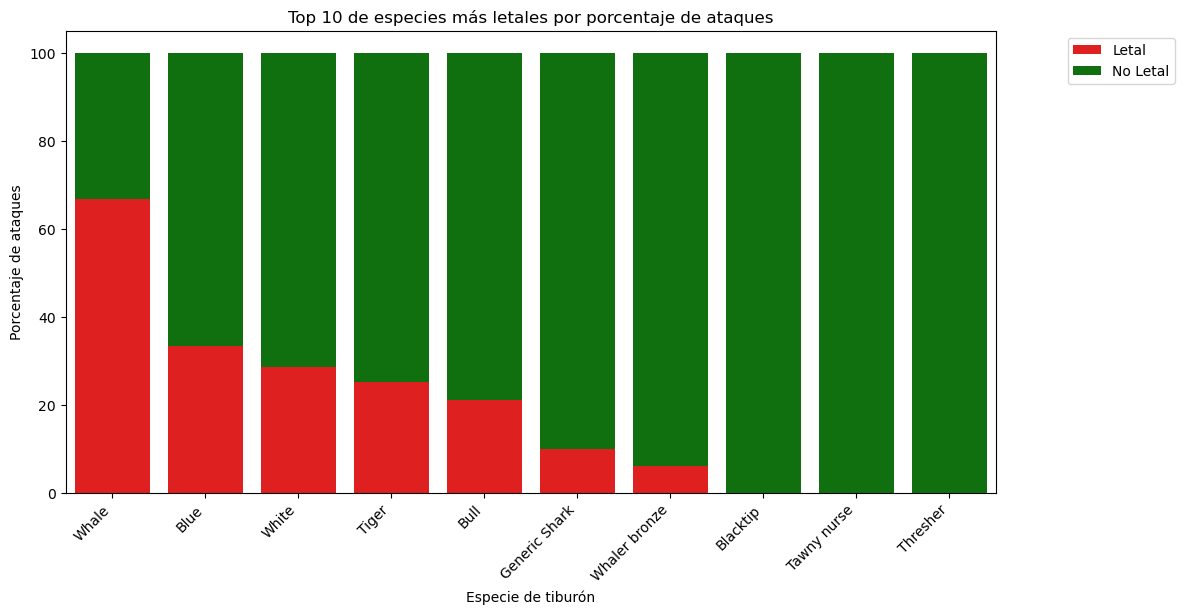

In [166]:
attack_counts = attack_sin_nan.groupby(['Species', 'Fatal (Y/N)']).size().unstack().fillna(0)
attack_counts['Lethal Percentage'] = (attack_counts['Y'] / (attack_counts['Y'] + attack_counts['N'])) * 100
order = attack_counts.sort_values(by='Lethal Percentage', ascending=False).index[:10]
attack_counts_top = attack_counts.loc[order]
attack_counts_top.index = attack_counts_top.index.str.replace(' shark', '', regex=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=attack_counts_top.index, y=attack_counts_top['Lethal Percentage'], color='red', label='Letal')
sns.barplot(x=attack_counts_top.index, y=100 - attack_counts_top['Lethal Percentage'], bottom=attack_counts_top['Lethal Percentage'], color='green', label='No Letal')
plt.title('Top 10 de especies más letales por porcentaje de ataques')
plt.xlabel('Especie de tiburón')
plt.ylabel('Porcentaje de ataques')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.show()

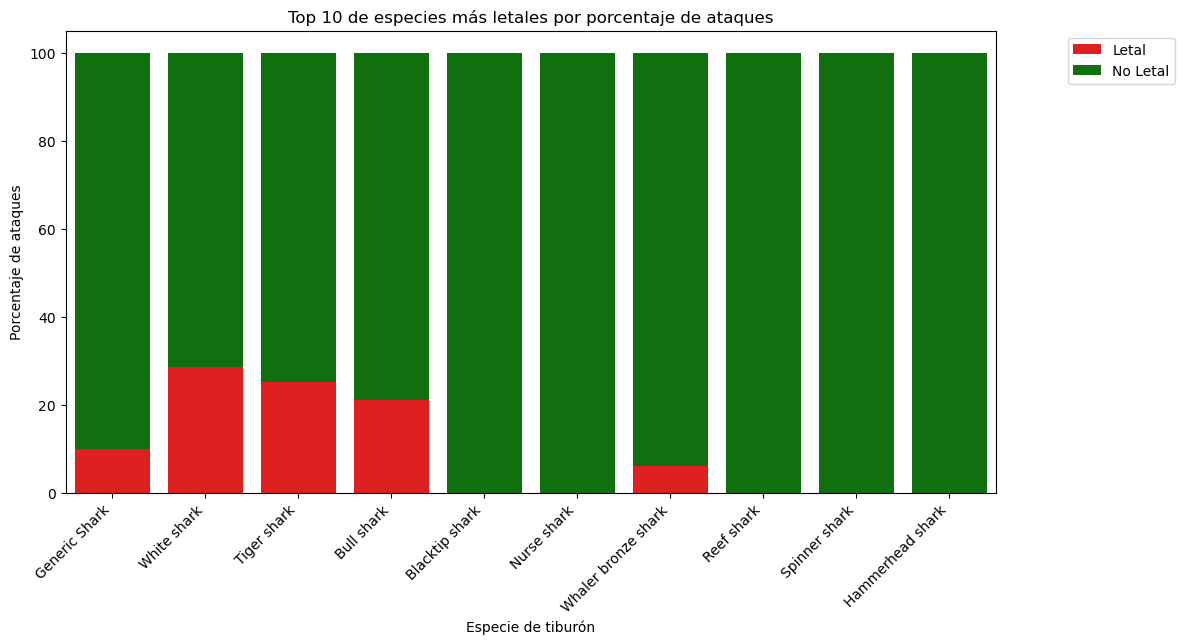

In [167]:
attack_counts = attack_sin_nan.groupby(['Species', 'Fatal (Y/N)']).size().unstack().fillna(0)
attack_counts['Total Attacks'] = attack_counts.sum(axis=1)
attack_counts['Lethal Percentage'] = (attack_counts['Y'] / attack_counts['Total Attacks']) * 100

order = attack_counts.sort_values(by='Total Attacks', ascending=False).index[:10]
attack_counts_top = attack_counts.loc[order]

plt.figure(figsize=(12, 6))
sns.barplot(x=attack_counts_top.index, y=attack_counts_top['Lethal Percentage'], color='red', label='Letal')
sns.barplot(x=attack_counts_top.index, y=100 - attack_counts_top['Lethal Percentage'], bottom=attack_counts_top['Lethal Percentage'], color='green', label='No Letal')

plt.title('Top 10 de especies más letales por porcentaje de ataques')
plt.xlabel('Especie de tiburón')
plt.ylabel('Porcentaje de ataques')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=45, ha='right') 

plt.show()

In [168]:
attack_sin_nan.keys()

Index(['Date', 'Year', 'Country', 'Area', 'Location', 'Activity', 'Sex', 'Age',
       'Injury', 'Fatal (Y/N)', 'Time', 'Species', 'Investigator or Source'],
      dtype='object')

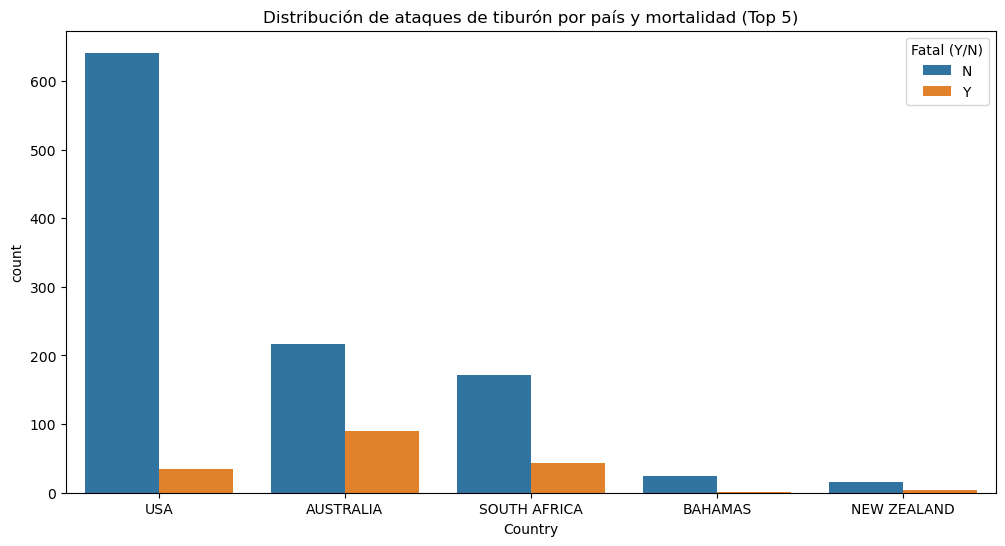

In [169]:
top_countries = attack_sin_nan['Country'].value_counts().nlargest(5).index
df_top_countries = attack_sin_nan[attack_sin_nan['Country'].isin(top_countries)]
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', hue='Fatal (Y/N)', data=df_top_countries)
plt.title('Distribución de ataques de tiburón por país y mortalidad (Top 5)')
plt.show()

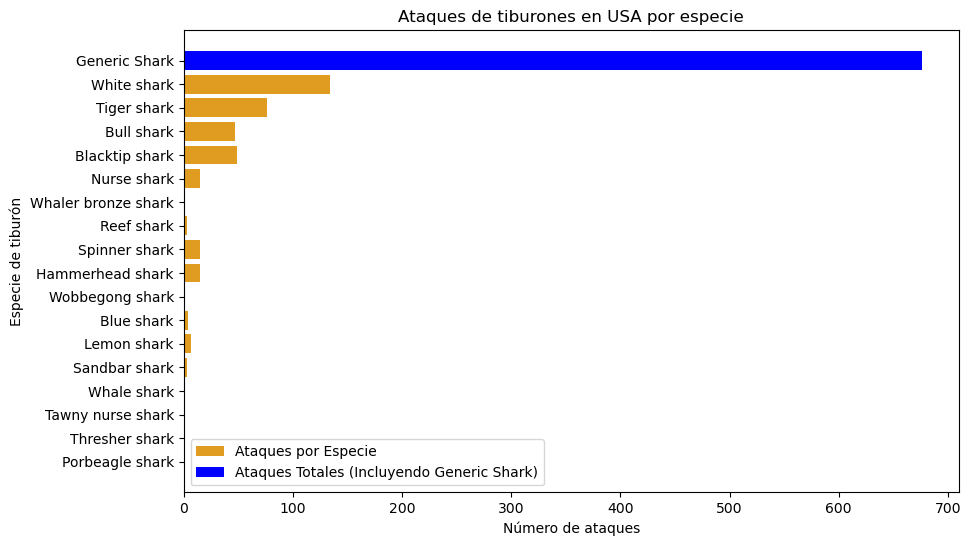

In [170]:
attack_counts = attack_sin_nan.groupby(['Species', 'Country']).size().unstack().fillna(0)
sorted_order = attack_counts.sum(axis=1).sort_values(ascending=False).index
attack_counts_sorted = attack_counts.loc[sorted_order]
total_attacks = attack_counts_sorted.sum(axis=0)['USA']

plt.figure(figsize=(10, 6))
sns.barplot(x=attack_counts_sorted['USA'], y=attack_counts_sorted.index, color='orange', label='Ataques por Especie')
plt.barh('Total Attacks', total_attacks, color='blue', label='Ataques Totales (Incluyendo Generic Shark)')
plt.title('Ataques de tiburones en USA por especie')
plt.xlabel('Número de ataques')
plt.ylabel('Especie de tiburón')
plt.legend()
plt.show()

Hacer un grafico en que se compare la mortalidad de las diferentes especies, crear una nueva columna que nos indique el porcentaje de fallecimientos y comparar este porcentaje con otros

In [171]:
   
attack_sin_nan['Activity'] = attack_sin_nan['Activity'].apply(ac)


In [172]:
attack_sin_nan['Activity'].value_counts()

Activity
Surf                        462
Swimming                    256
Spearfishing                118
Otros                        95
Fishing                      63
Diving                       63
Wading                       54
Standing                     42
Scuba diving                 38
Snorkeling                   38
Body boarding                38
Body surfing                 23
Free diving                  23
Boogie boarding              16
Kayaking                     16
Walking                      11
Floating                     11
Playing                       8
Paddling                      7
Paddle boarding               6
Kite surfing                  3
Stand-up paddleboarding       3
Sup                           3
Kite boarding                 2
Shark fishing                 2
Kayak fishing                 2
Night bathing                 1
Playing in the water          1
Hand feeding sharks           1
Rowing                        1
Scallop diving on hookah      1

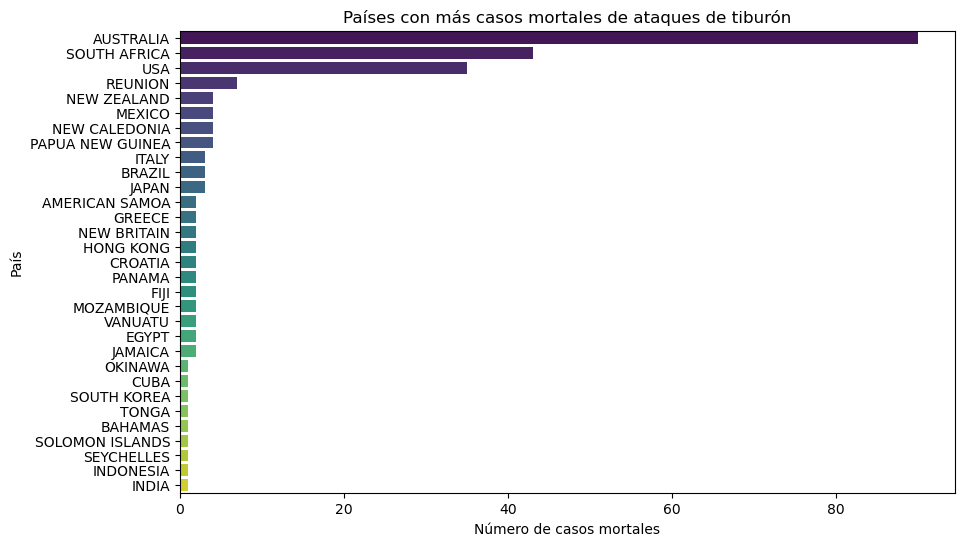

In [173]:
fatalities_counts = attack_sin_nan[attack_sin_nan['Fatal (Y/N)'] == 'Y']['Country'].value_counts().reset_index()
fatalities_counts.columns = ['Country', 'Number of Fatalities']

plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Fatalities', y='Country', data=fatalities_counts, palette='viridis')
plt.title('Países con más casos mortales de ataques de tiburón')
plt.xlabel('Número de casos mortales')
plt.ylabel('País')
plt.show()

In [174]:
# mirar que especies han atacado mas en australia y en sur africa

In [175]:
len(attack_sin_nan['Injury'])

1417

In [176]:
attack_sin_nan['Investigator or Source'].value_counts() # Tengo que limpiar estos datos, hacer una funcion filtro

Investigator or Source
S. Petersohn, GSAF                                      30
C. Creswell, GSAF                                       27
R. Collier, GSAF                                        22
T. Peake, GSAF                                          21
R. Collier                                              18
                                                        ..
Hawaii Department of Land and Natural Resources          1
L.A.Hughes; G. Holt, Scubaradio.com                      1
Cape Argus, Cape Times, 10/3/2005                        1
C. Creswell, GSAF; K. Galliard,  Sun News, 9/21/2005     1
J. Fayrer, M.D.                                          1
Name: count, Length: 1189, dtype: int64

In [177]:
lista_source = attack_sin_nan['Investigator or Source'].value_counts().index.tolist()
print(lista_source)

['S. Petersohn, GSAF', 'C. Creswell, GSAF', 'R. Collier, GSAF', 'T. Peake, GSAF', 'R. Collier', 'A. Gifford, GSAF', 'B. Myatt, GSAF', 'E. Ritter, GSAF', 'M. Levine, GSAF', 'M. Vorenberg, GSAF', 'C. Creswell', 'M. Levine, R. Collier, E. Ritter, M. Fouda, et al', 'G. Van Grevelynghe', 'S. Petersohn, GSAF; Orlando Sentinel, 4/14/2001, p.A1', 'S. Petersohn', 'M. Levine, GSAF            ', 'Orlando Sentinel, 9/7/2013', 'R. Collier, GSAF                ', 'P.M. Lopes, GSAF', 'G. Kubota, Star Bulletin', 'GSAF', 'S. Petersohn, GSAF; Orlando Sentinel, 8/20/2001, p.B1; Daytona Beach News Journal, 8/20/2001, p.1A', 'S. Petersohn, GSAF ', 'B. May, AAP; G. Thiel', 'A. McNaught; Times-Courier (Lae, PNG), 12/10/1966; F. Dennis, p.23', 'R.D. Weeks, GSAF', 'Star Bulletin', 'M. Smale', 'WESH2, 10/6/2014', 'M. Hosina', 'Orlando Sentinel, 6/10/2000, p.A20 & 6/11/2000, p.A22; T. Allen, pp.74-75Jun 10, 2000. pg. A.20', 'A. Brenneka, Shark Attack Survivors', 'Local6.com', 'G. Kubota, Honolulu Star Bulletin',

In [178]:
cp(attack_sin_nan, 'Investigator or Source')

,Palabra,Frecuencia
0,collier,185
1,news,130
2,levine,126
3,sentinel,93
4,herald,89
...,...,...
867,illing,1
868,illwarra,1
869,incident,1
870,informaciones,1


In [179]:
# atacan mas a mujeres que a hombres? ()

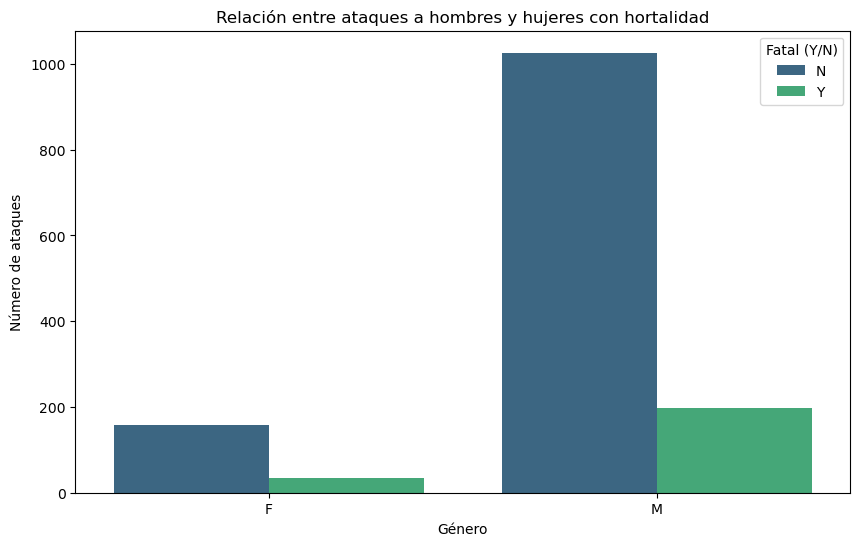

In [180]:
gender_fatal_counts = attack_sin_nan.groupby(['Sex', 'Fatal (Y/N)']).size().reset_index(name='Number of Attacks')
gender_fatal_counts_filtered = gender_fatal_counts[gender_fatal_counts['Sex'].isin(['M', 'F'])]

plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Number of Attacks', hue='Fatal (Y/N)', data=gender_fatal_counts_filtered, palette='viridis')
plt.title('Relación entre ataques a hombres y hujeres con hortalidad')
plt.xlabel('Género')
plt.ylabel('Número de ataques')
plt.legend(title='Fatal (Y/N)')
plt.show()

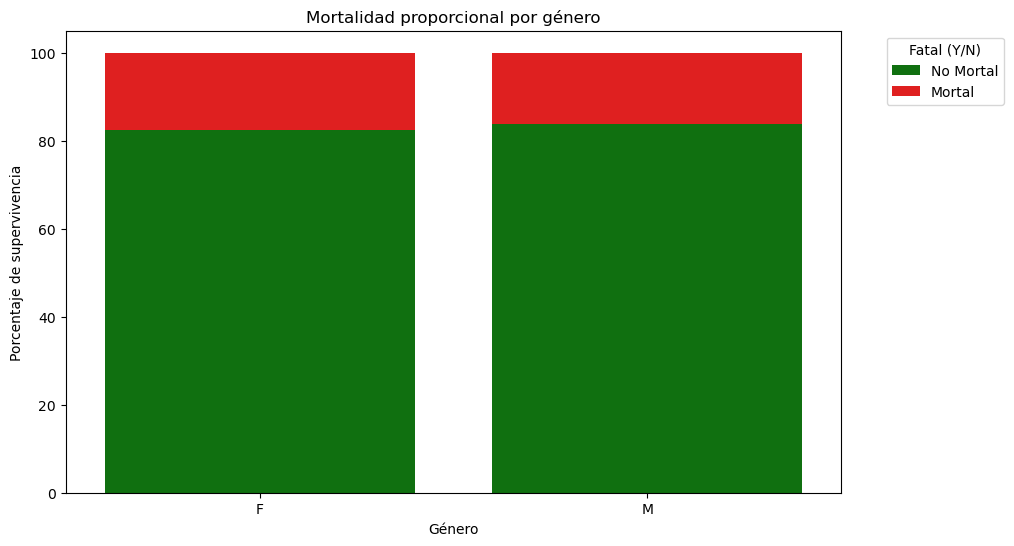

In [181]:
gender_fatal_percentage = gender_fatal_counts_filtered.pivot(index='Sex', columns='Fatal (Y/N)', values='Number of Attacks')
gender_fatal_percentage['Survival Percentage'] = (gender_fatal_percentage['N'] / (gender_fatal_percentage['Y'] + gender_fatal_percentage['N'])) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_fatal_percentage.index, y='Survival Percentage', data=gender_fatal_percentage, color='green', label='No Mortal')
sns.barplot(x=gender_fatal_percentage.index, y=100 - gender_fatal_percentage['Survival Percentage'], bottom=gender_fatal_percentage['Survival Percentage'], color='red', label='Mortal')

plt.title('Mortalidad proporcional por género')
plt.xlabel('Género')
plt.ylabel('Porcentaje de supervivencia')
plt.legend(title='Fatal (Y/N)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [182]:
attack_sin_nan['Activity'].value_counts()

Activity
Surf                        462
Swimming                    256
Spearfishing                118
Otros                        95
Fishing                      63
Diving                       63
Wading                       54
Standing                     42
Scuba diving                 38
Snorkeling                   38
Body boarding                38
Body surfing                 23
Free diving                  23
Boogie boarding              16
Kayaking                     16
Walking                      11
Floating                     11
Playing                       8
Paddling                      7
Paddle boarding               6
Kite surfing                  3
Stand-up paddleboarding       3
Sup                           3
Kite boarding                 2
Shark fishing                 2
Kayak fishing                 2
Night bathing                 1
Playing in the water          1
Hand feeding sharks           1
Rowing                        1
Scallop diving on hookah      1

In [183]:
female_attacks['Activity'].unique()

NameError: name 'female_attacks' is not defined

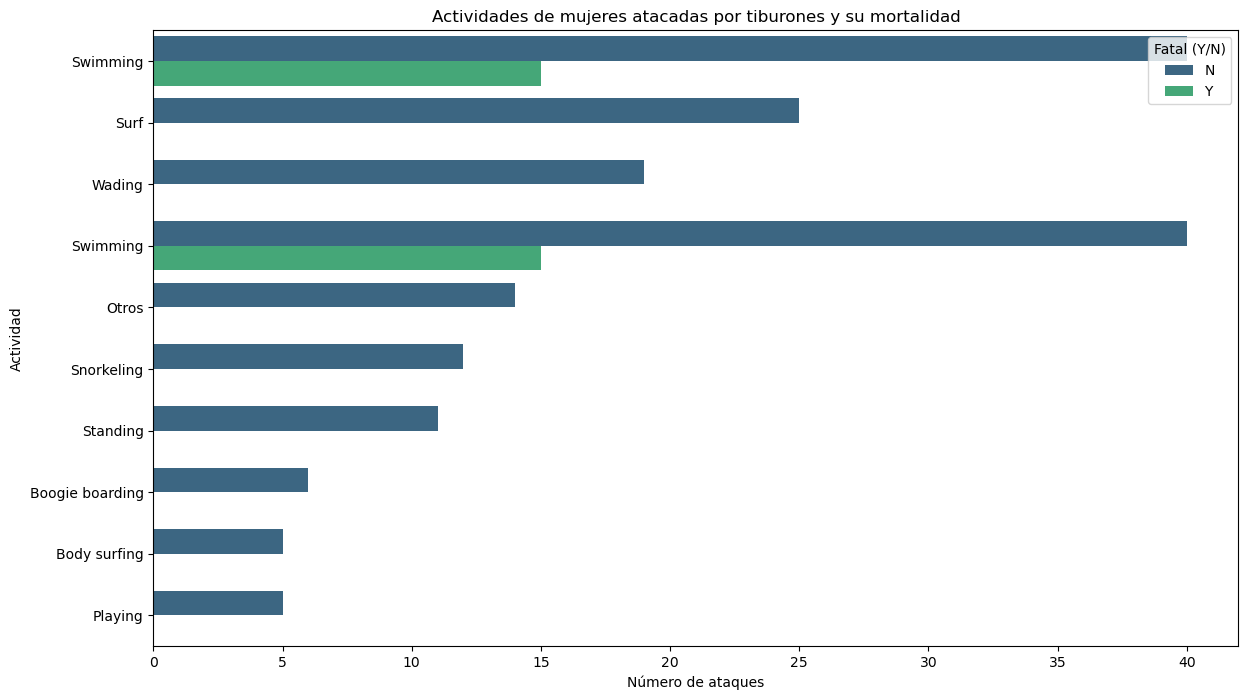

In [184]:
female_attacks = attack_sin_nan[attack_sin_nan['Sex'] == 'F']
female_activity_counts = female_attacks.groupby(['Activity', 'Fatal (Y/N)']).size().reset_index(name='Number of Attacks')
filtered_female_activity_counts = female_activity_counts[female_activity_counts['Number of Attacks'] >= 5]
order = filtered_female_activity_counts.sort_values(by='Number of Attacks', ascending=False)['Activity']

plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Attacks', y='Activity', hue='Fatal (Y/N)', data=filtered_female_activity_counts, palette='viridis', order=order)
plt.title('Actividades de mujeres atacadas por tiburones y su mortalidad')
plt.xlabel('Número de ataques')
plt.ylabel('Actividad')
plt.legend(title='Fatal (Y/N)')
plt.show()

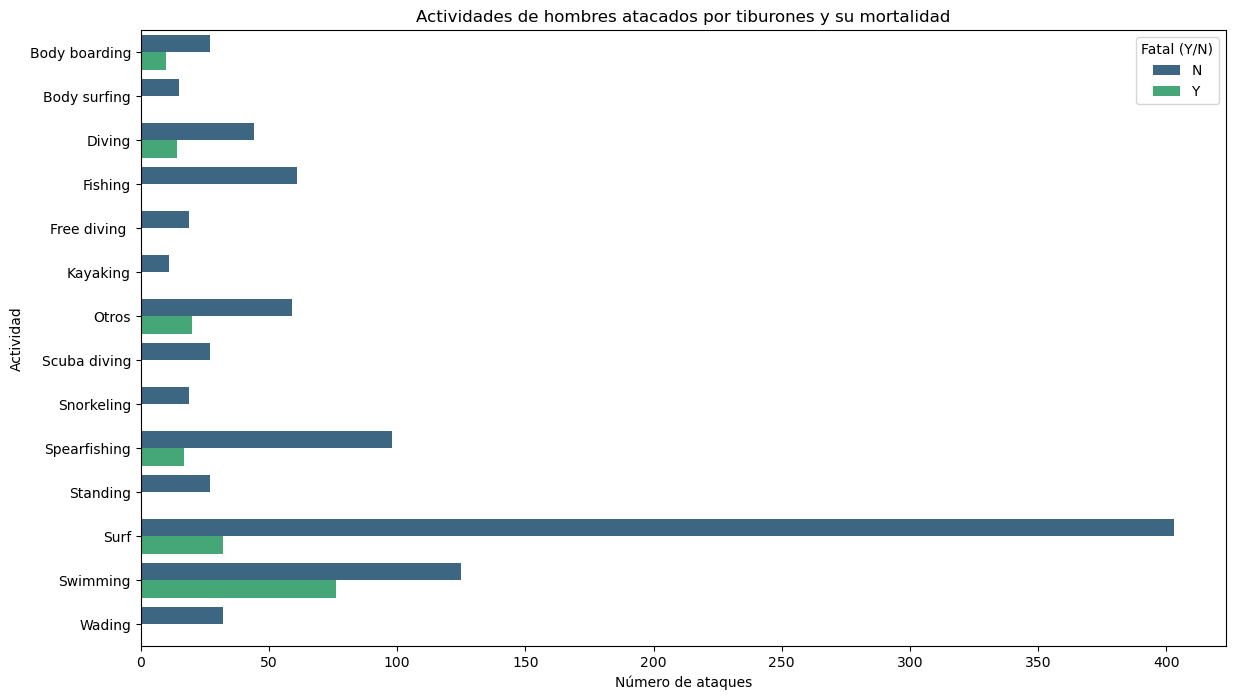

In [185]:
female_attacks = attack_sin_nan[attack_sin_nan['Sex'] == 'M']
female_activity_counts = female_attacks.groupby(['Activity', 'Fatal (Y/N)']).size().reset_index(name='Number of Attacks')
filtered_female_activity_counts = female_activity_counts[female_activity_counts['Number of Attacks'] >= 10]

plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Attacks', y='Activity', hue='Fatal (Y/N)', data=filtered_female_activity_counts, palette='viridis')
plt.title('Actividades de hombres atacados por tiburones y su mortalidad')
plt.xlabel('Número de ataques')
plt.ylabel('Actividad')
plt.legend(title='Fatal (Y/N)')
plt.show()



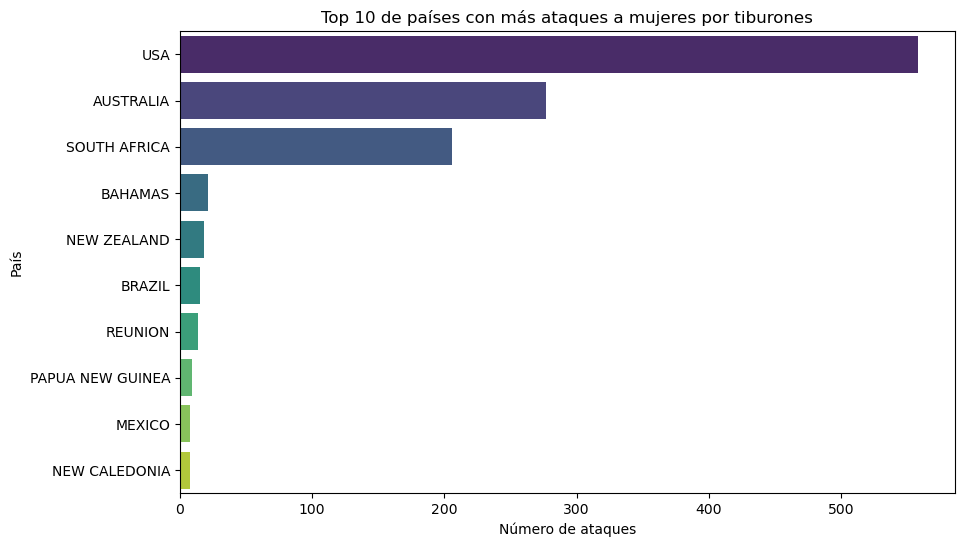

In [186]:
female_countries = female_attacks['Country'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=female_countries.values, y=female_countries.index, palette='viridis')
plt.title('Top 10 de países con más ataques a mujeres por tiburones')
plt.xlabel('Número de ataques')
plt.ylabel('País')
plt.show()

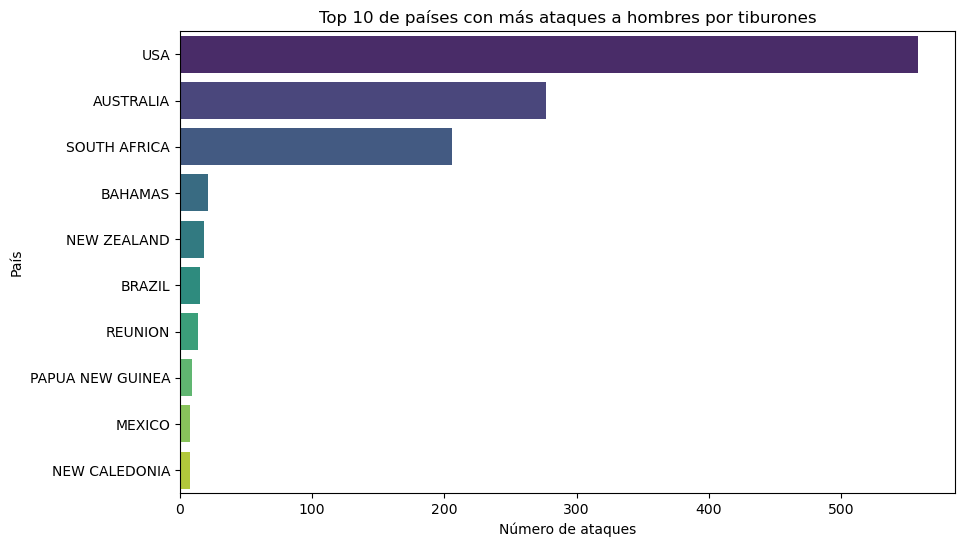

In [187]:
male_attacks = attack_sin_nan[attack_sin_nan['Sex'] == 'M']
male_countries = male_attacks['Country'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=male_countries.values, y=male_countries.index, palette='viridis')
plt.title('Top 10 de países con más ataques a hombres por tiburones')
plt.xlabel('Número de ataques')
plt.ylabel('País')
plt.show()

In [188]:
generic_shark_counts = attack_sin_nan[attack_sin_nan['Species'].str.contains('Generic Shark', case=False, na=False)]['Investigator or Source'].value_counts().reset_index()
generic_shark_counts.columns = ['Investigator or Source', 'Count']


In [189]:
print(generic_shark_counts)


                                Investigator or Source  Count
0                                   S. Petersohn, GSAF     26
1                                    C. Creswell, GSAF     19
2                                           R. Collier      5
3                                       B. Myatt, GSAF      4
4                                         S. Petersohn      4
..                                                 ...    ...
490                                        KETK56 News      1
491                                    T. Jerome, GSAF      1
492  Sunday Argus, 10/10/2004; W. Steenkamp, Cape T...      1
493                                           J. Eager      1
494                                    J. Fayrer, M.D.      1

[495 rows x 2 columns]


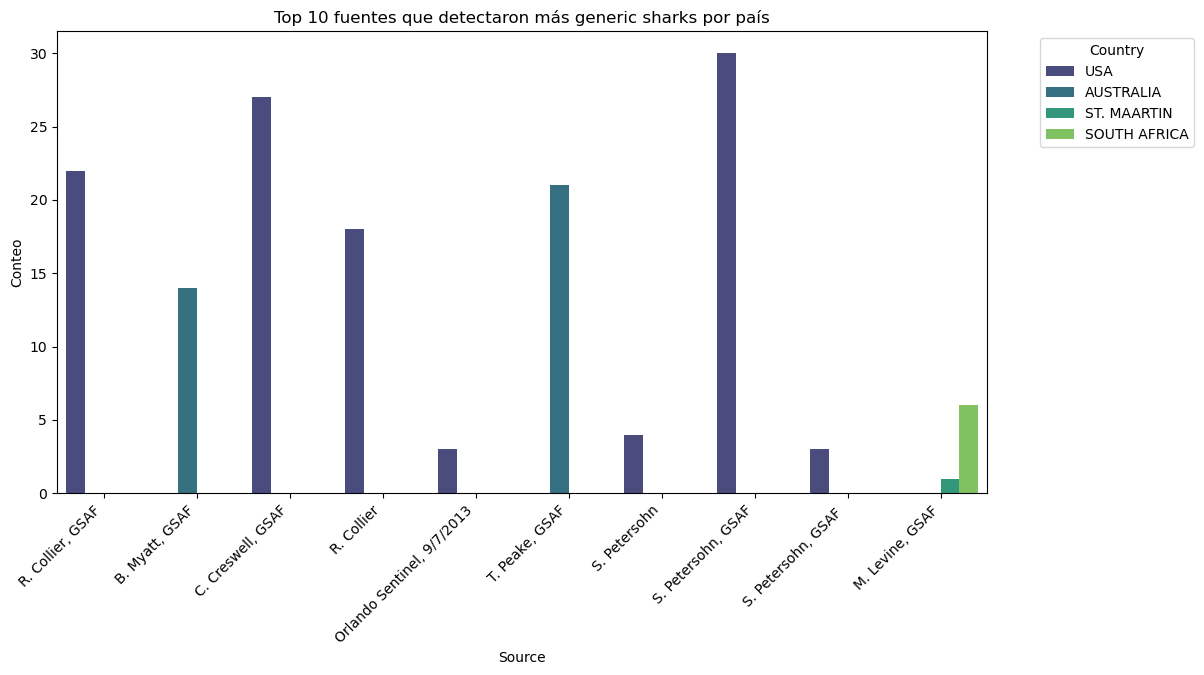

In [190]:
generic_shark_counts = attack_sin_nan[attack_sin_nan['Species'].str.contains('Generic Shark', case=False, na=False)]
top_sources = generic_shark_counts['Investigator or Source'].value_counts().head(10).index
top_sources_df = attack_sin_nan[attack_sin_nan['Investigator or Source'].isin(top_sources)][['Investigator or Source', 'Country']]

plt.figure(figsize=(12, 6))
sns.countplot(x='Investigator or Source', data=top_sources_df, hue='Country', palette='viridis')
plt.title('Top 10 fuentes que detectaron más generic sharks por país')
plt.xlabel('Source')
plt.ylabel('Conteo')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [191]:
from   funciones_py import source_cleaner as sc

In [192]:
attack_sin_nan_copia = attack_sin_nan.copy()
attack_sin_nan_copia = attack_sin_nan_copia['Investigator or Source'].apply(sc)
attack_sin_nan_copia.value_counts()


Investigator or Source
Unknown Source      861
Collier             143
Levine              129
Petersohn            82
Creswell             48
Orlando sentinel     46
Peake                28
Gifford              23
Ritter               20
Myatt                15
Vorenberg            10
Lopes                 7
Van grevelynghe       5
Name: count, dtype: int64

In [193]:
# relacionar los ataques de tiburones con las fechas en el año, primavera, ver...

attack_sin_nan.head()

,Date,Year,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
6,03-Jun-2018,2018.0,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018"
8,26-May-2018,2018.0,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,15,Lower left leg bitten,N,17h00,Bull shark,"K.McMurray, TrackingSharks.com"
10,24-May-2018,2018.0,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Reef shark,"ABC.net.au ,05/24/2018"
18,28-Apr-2018,2018.0,COSTA RICA,Cocos Island,Manuelita,Scuba diving,M,30,"No injury, shark bit scuba gear",N,10h40,Tiger shark,Costa Rica Star. 4/28/2018


In [194]:
attack_sin_nan['Mes'] = attack_sin_nan['Date'].apply(em)

In [195]:
attack_sin_nan['Mes'].value_counts()

Mes
10.0    140
9.0     139
8.0     138
7.0     125
6.0     123
4.0     114
1.0     114
12.0     99
5.0      98
3.0      96
11.0     96
2.0      87
Name: count, dtype: int64

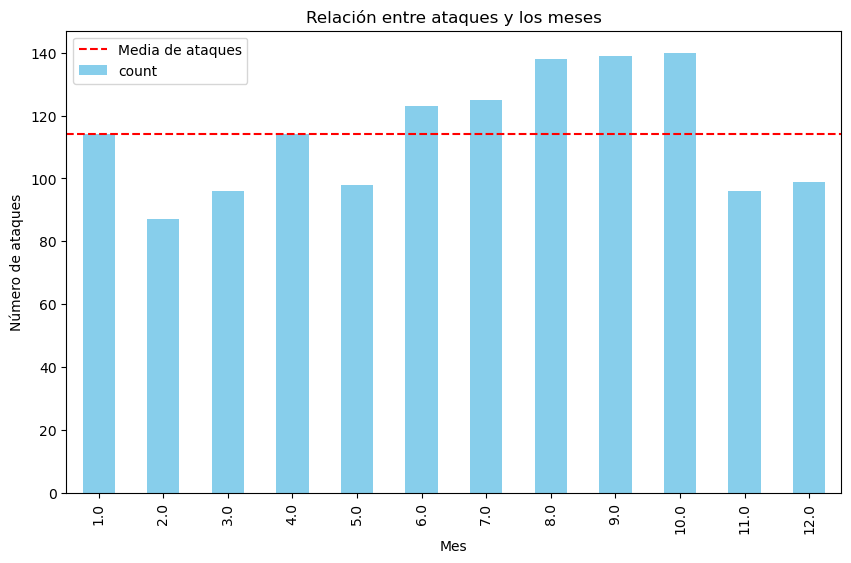

In [197]:
plt.figure(figsize=(10, 6))
ax = attack_sin_nan['Mes'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.axhline(y=attack_sin_nan['Mes'].value_counts().mean(), color='red', linestyle='--', label='Media de ataques')
plt.title('Relación entre ataques y los meses')
plt.xlabel('Mes')
plt.ylabel('Número de ataques')
plt.legend()
plt.show()

In [ ]:
attack_sin_nan['Country'].unique()

array(['USA', 'BRAZIL', 'AUSTRALIA', 'COSTA RICA', 'MALDIVES',
       'SOUTH AFRICA', 'CUBA', 'BAHAMAS', 'INDONESIA', 'SPAIN', 'EGYPT',
       'NEW ZEALAND', 'FRENCH POLYNESIA', 'NEW CALEDONIA', 'ECUADOR',
       'THAILAND', 'REUNION', 'MEXICO', 'JAMAICA', 'PAPUA NEW GUINEA',
       'RUSSIA', 'SEYCHELLES', 'VIETNAM', 'MOZAMBIQUE', 'SCOTLAND',
       'UNITED KINGDOM', 'TAIWAN', 'GUAM', 'CROATIA', 'ENGLAND', 'FIJI',
       'TONGA', 'ST. MAARTIN', 'GRAND CAYMAN', 'VANUATU', 'VENEZUELA',
       'TURKS & CAICOS', 'OKINAWA', 'MARSHALL ISLANDS', 'HONG KONG',
       'JAPAN', 'ITALY', 'SOUTH KOREA', 'ISRAEL', 'MICRONESIA',
       'COLUMBIA', 'NEW BRITAIN', 'PALAU', 'SOLOMON ISLANDS',
       'FEDERATED STATES OF MICRONESIA', 'GREECE', 'BRITISH WEST INDIES',
       'NORTH PACIFIC OCEAN', 'BERMUDA', 'AMERICAN SAMOA',
       'PACIFIC OCEAN', 'SENEGAL', 'ARGENTINA', 'EL SALVADOR', 'IRAQ',
       'PANAMA', 'INDIA'], dtype=object)

In [ ]:

attack_sin_nan['Hemisferio'] = attack_sin_nan['Country'].apply(ah)

In [ ]:
attack_sin_nan.keys()

Index(['Date', 'Year', 'Country', 'Area', 'Location', 'Activity', 'Sex', 'Age',
       'Injury', 'Fatal (Y/N)', 'Time', 'Species', 'Investigator or Source',
       'Mes', 'Hemisferio'],
      dtype='object')

In [ ]:
attack_sin_nan.head()

,Date,Year,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Mes,Hemisferio
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",6.0,HN
6,03-Jun-2018,2018.0,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6.0,HS
8,26-May-2018,2018.0,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,15,Lower left leg bitten,N,17h00,Bull shark,"K.McMurray, TrackingSharks.com",5.0,HN
10,24-May-2018,2018.0,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Reef shark,"ABC.net.au ,05/24/2018",5.0,HS
18,28-Apr-2018,2018.0,COSTA RICA,Cocos Island,Manuelita,Scuba diving,M,30,"No injury, shark bit scuba gear",N,10h40,Tiger shark,Costa Rica Star. 4/28/2018,4.0,HS


In [ ]:
attack_sin_nan_copia = attack_sin_nan.copy()


df_resultado = ae(attack_sin_nan_copia)
df_resultado.head()

,Date,Year,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Mes,Hemisferio,Season
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",6.0,HN,Verano
6,03-Jun-2018,2018.0,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",6.0,HS,Invierno
8,26-May-2018,2018.0,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,15,Lower left leg bitten,N,17h00,Bull shark,"K.McMurray, TrackingSharks.com",5.0,HN,Primavera
10,24-May-2018,2018.0,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Reef shark,"ABC.net.au ,05/24/2018",5.0,HS,Otoño
18,28-Apr-2018,2018.0,COSTA RICA,Cocos Island,Manuelita,Scuba diving,M,30,"No injury, shark bit scuba gear",N,10h40,Tiger shark,Costa Rica Star. 4/28/2018,4.0,HS,Otoño


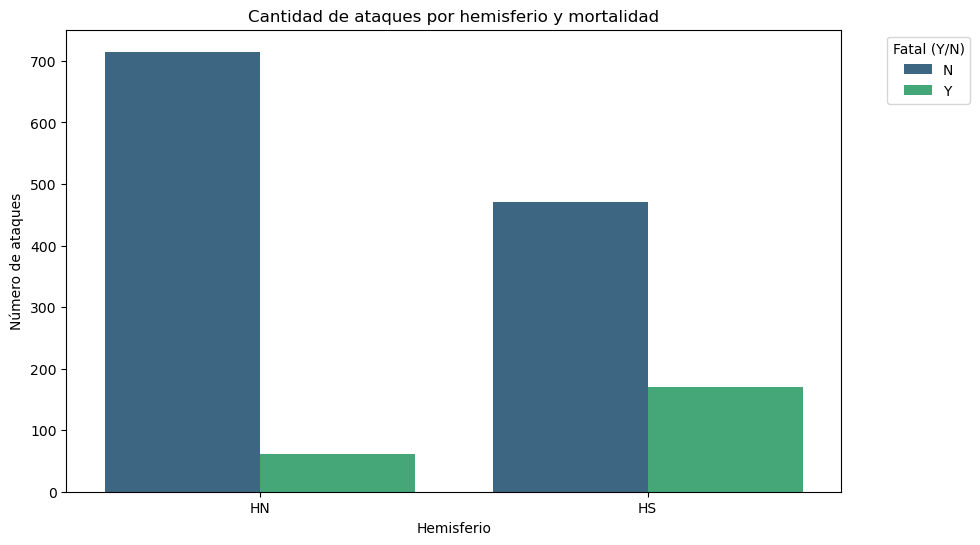

In [ ]:
df_plot = attack_sin_nan[['Hemisferio', 'Fatal (Y/N)']]

plt.figure(figsize=(10, 6))
sns.countplot(x='Hemisferio', hue='Fatal (Y/N)', data=df_plot, palette='viridis')
plt.title('Cantidad de ataques por hemisferio y mortalidad')
plt.xlabel('Hemisferio')
plt.ylabel('Número de ataques')
plt.legend(title='Fatal (Y/N)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

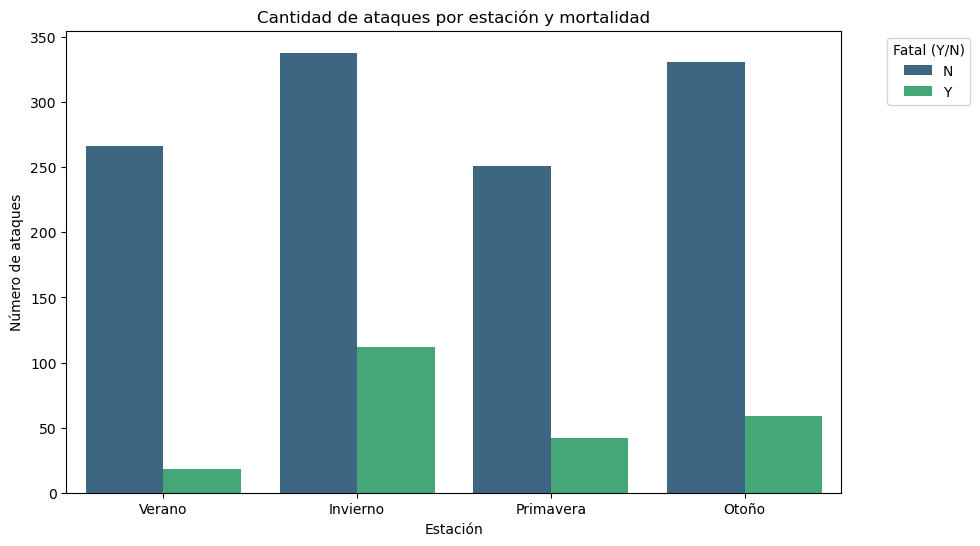

In [ ]:
df_plot = attack_sin_nan_copia[['Season', 'Fatal (Y/N)']]

plt.figure(figsize=(10, 6))
sns.countplot(x='Season', hue='Fatal (Y/N)', data=df_plot, palette='viridis')
plt.title('Cantidad de ataques por estación y mortalidad')
plt.xlabel('Estación')
plt.ylabel('Número de ataques')
plt.legend(title='Fatal (Y/N)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

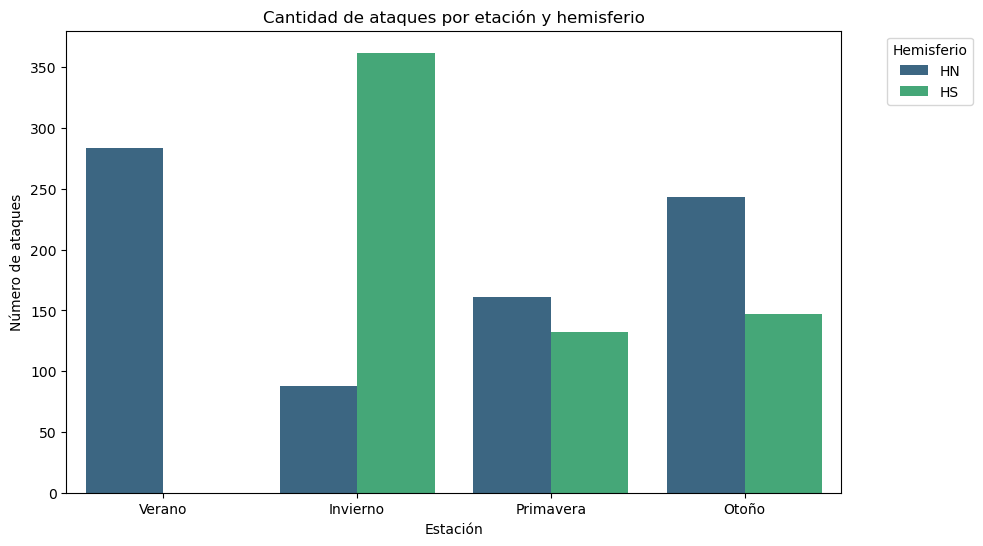

In [ ]:
df_plot = attack_sin_nan_copia[['Season', 'Hemisferio', 'Fatal (Y/N)']]

plt.figure(figsize=(10, 6))
sns.countplot(x='Season', hue='Hemisferio', data=df_plot, palette='viridis')
plt.title('Cantidad de ataques por etación y hemisferio')
plt.xlabel('Estación')
plt.ylabel('Número de ataques')
plt.legend(title='Hemisferio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

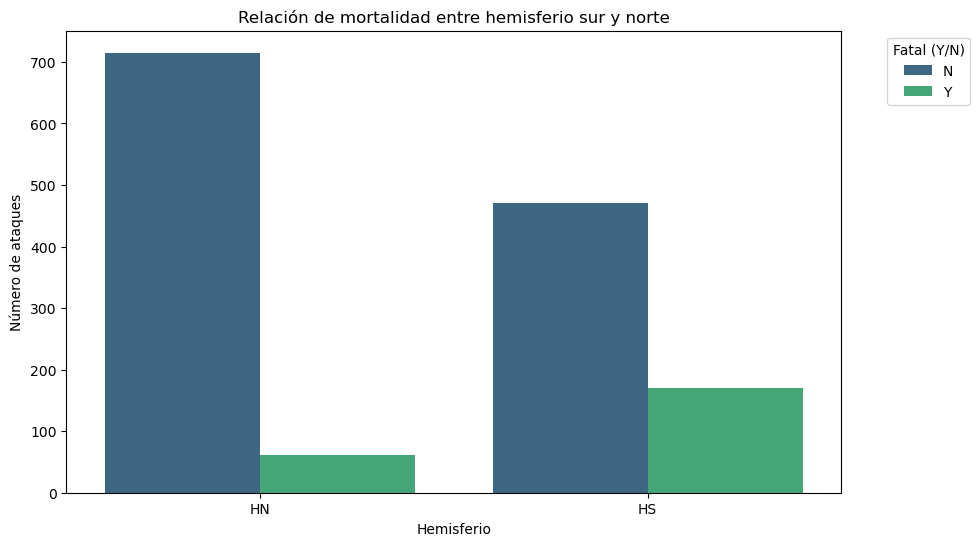

In [ ]:
aggregated_data = attack_sin_nan_copia.groupby(['Hemisferio', 'Fatal (Y/N)']).size().reset_index(name='Number of Attacks')

plt.figure(figsize=(10, 6))
sns.barplot(x='Hemisferio', y='Number of Attacks', hue='Fatal (Y/N)', data=aggregated_data, palette='viridis')
plt.title('Relación de mortalidad entre hemisferio sur y norte')
plt.xlabel('Hemisferio')
plt.ylabel('Número de ataques')
plt.legend(title='Fatal (Y/N)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

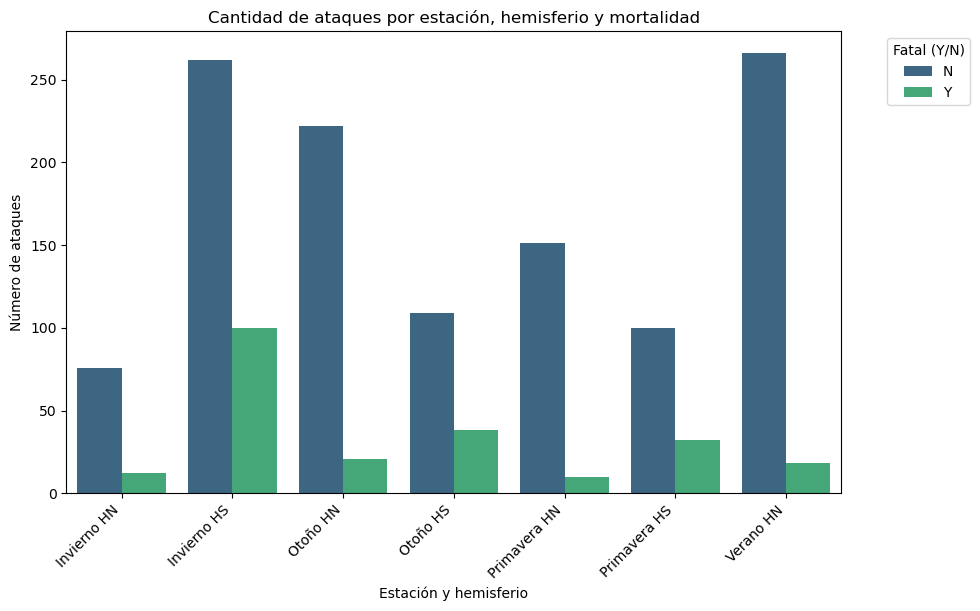

In [ ]:
attack_sin_nan_copia['Season_Hemisferio'] = attack_sin_nan_copia['Season'] + ' ' + attack_sin_nan_copia['Hemisferio']
aggregated_data = attack_sin_nan_copia.groupby(['Season_Hemisferio', 'Fatal (Y/N)']).size().reset_index(name='Number of Attacks')

plt.figure(figsize=(10, 6))
sns.barplot(x='Season_Hemisferio', y='Number of Attacks', hue='Fatal (Y/N)', data=aggregated_data, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Cantidad de ataques por estación, hemisferio y mortalidad')
plt.xlabel('Estación y hemisferio')
plt.ylabel('Número de ataques')
plt.legend(title='Fatal (Y/N)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


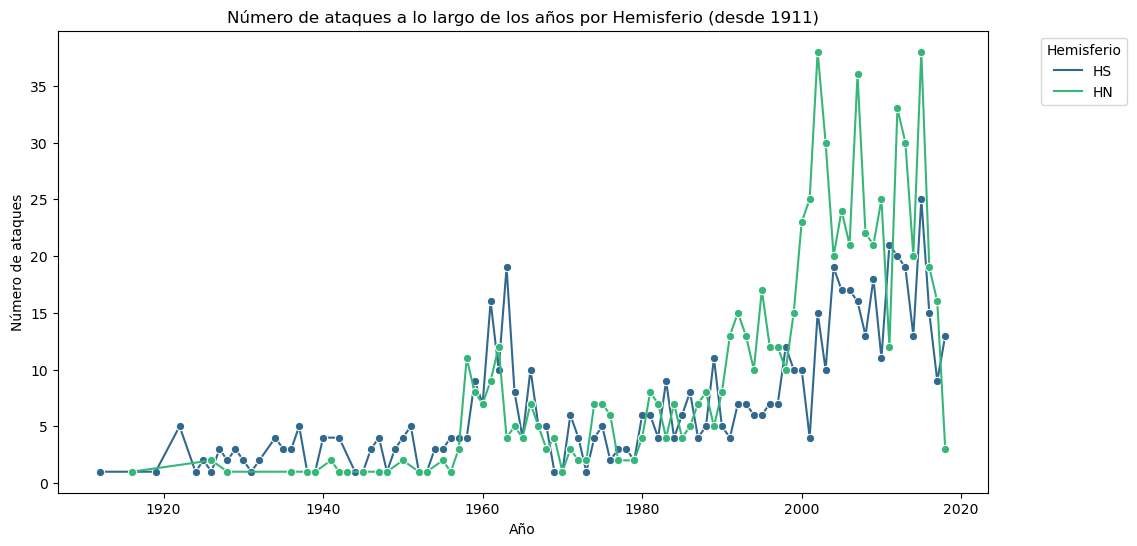

In [ ]:
filtered_data = attack_sin_nan_copia[attack_sin_nan_copia['Year'] > 1910]
yearly_data = filtered_data.groupby(['Year', 'Hemisferio']).size().reset_index(name='Number of Attacks')

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Number of Attacks', hue='Hemisferio', data=yearly_data, marker='o', palette='viridis')

plt.title('Número de ataques a lo largo de los años por hemisferio (desde 1911)')
plt.xlabel('Año')
plt.ylabel('Número de ataques')
plt.legend(title='Hemisferio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()